In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [10]:
data= pd.read_csv('NewspaperData.csv')
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.shape#34 rows an 3 columns

(34, 3)

In [4]:
data.info()#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [8]:
data[data.duplicated()]#no duplicated values

,Newspaper,daily,sunday


In [11]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [12]:
data.corr()

<ipython-input-12-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='sunday'>

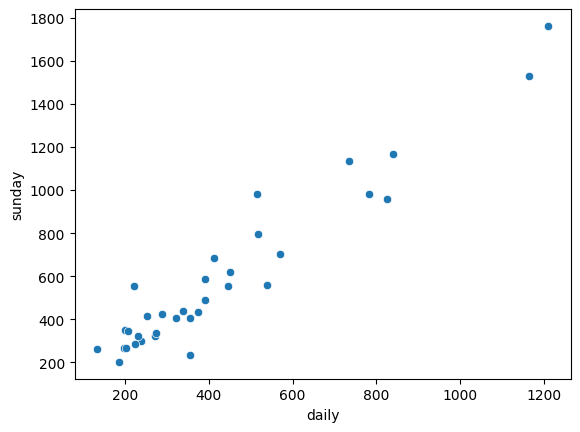

In [14]:
sns.scatterplot(x=data.daily,y=data.sunday)

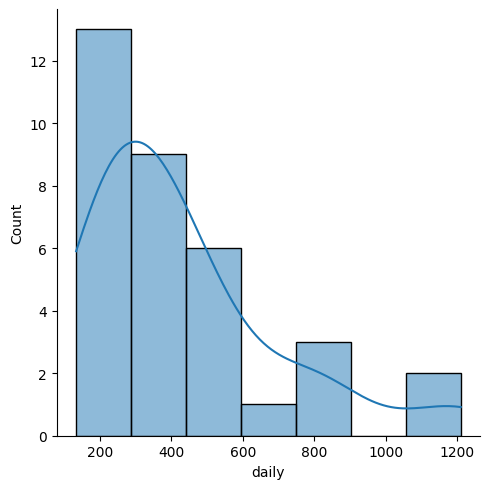

In [17]:
sns.displot(data.daily,kde=True)

## Fitting a linear model

In [19]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=data).fit()

In [20]:
model.summary()
#y=mx+c->  Sunday=1.3397*daily+13.8356

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           6.02e-19
Time:                        09:38:35   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Creating the line

In [22]:
x1=data.daily
y=data.sunday

0      391.952
1      516.981
2      355.628
3      238.555
4      537.780
5      733.775
6      198.832
7      252.624
8      206.204
9      231.177
10     449.755
11     288.571
12     185.736
13    1164.388
14     444.581
15     412.871
16     272.280
17     781.796
18    1209.225
19     825.512
20     223.748
21     354.843
22     515.523
23     220.465
24     337.672
25     197.120
26     133.239
27     374.009
28     273.844
29     570.364
30     391.286
31     201.860
32     321.626
33     838.902
Name: daily, dtype: float64

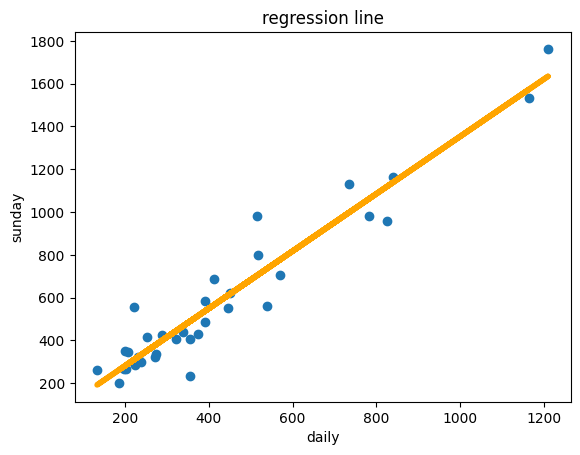

In [38]:
#Create a scatterplot
plt.scatter(x1,y)
#Define the regression equation so we can plot it later
yhat=1.3397*x1+13.8356
#plot the regression line against the independent variable
plt.title('regression line')
plt.xlabel('daily')
plt.ylabel('sunday')
fig=plt.plot(x1,yhat,lw=4,c='orange')
fig;

In [37]:
yhat=model.predict(data.daily)

In [57]:
yhat

0      538.933694
1      706.435046
2      490.270432
3      333.427733
4      734.299466
5      996.873967
6      280.210830
7      352.275973
8      290.087099
9      323.543427
10     616.372373
11     400.434169
12     262.666119
13    1573.766204
14     609.440766
15     566.958879
16     378.609116
17    1061.207701
18    1633.834332
19    1119.774026
20     313.590796
21     489.218767
22     704.481763
23     309.192560
24     466.214778
25     277.917264
26     192.335888
27     514.895457
28     380.704407
29     777.952251
30     538.041454
31     284.267442
32     444.717952
33    1137.712609
Name: daily, dtype: float64

In [40]:
yact=data.sunday

In [41]:
yact

0      488.506
1      798.298
2      235.084
3      299.451
4      559.093
5     1133.249
6      348.744
7      417.779
8      344.522
9      323.084
10     620.752
11     423.305
12     202.614
13    1531.527
14     553.479
15     685.975
16     324.241
17     983.240
18    1762.015
19     960.308
20     284.611
21     407.760
22     982.663
23     557.000
24     440.923
25     268.060
26     262.048
27     432.502
28     338.355
29     704.322
30     585.681
31     267.781
32     408.343
33    1165.567
Name: sunday, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yact,yhat)

11268.69212839254

# Lets try to add the feature newspaper and try encoding:

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder=LabelEncoder()

In [65]:
data['Newspaper_enc']=encoder.fit_transform(data.Newspaper)

In [67]:
data.head(10)

,Newspaper,daily,sunday,Newspaper_enc
0,Baltimore Sun,391.952,488.506,0
1,Boston Globe,516.981,798.298,1
2,Boston Herald,355.628,235.084,2
3,Charlotte Observer,238.555,299.451,3
4,Chicago Sun Times,537.780,559.093,4
5,Chicago Tribune,733.775,1133.249,5
6,Cincinnati Enquirer,198.832,348.744,6
7,Denver Post,252.624,417.779,7
8,Des Moines Register,206.204,344.522,8
9,Hartford Courant,231.177,323.084,9


In [68]:
model1=smf.ols("sunday~daily+Newspaper_enc",data=data).fit()

In [69]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.24e-17
Time:                        10:34:39   Log-Likelihood:                -206.68
No. Observations:                  34   AIC:                             419.4
Df Residuals:                      31   BIC:                             423.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.6614     48.176     -0.076      0.940    -101.917      94.594
daily             1.3396      0.072     18.725      0.000       1.194       1.485
Newspaper_enc     1.0645      1.934      0.550      0.586      -2.880       5.009
==============================================================================
Omnibus:                        2.789   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                1.581
Skew:                           0.451   Prob(JB):                        0.454
Kurtosis:                       3.548   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
ypred=model1.predict(data[['daily','Newspaper_enc']])

In [72]:
ypred

0      521.381042
1      689.929175
2      474.851972
3      319.090404
4      720.984203
5      984.595418
6      269.072696
7      342.194726
8      281.076958
9      315.594263
10     609.456718
11     394.605901
12     257.916961
13    1569.942720
14     606.783924
15     565.371056
16     378.105759
17    1061.696577
18    1635.327087
19    1122.385739
20     317.352403
21     494.026296
22     710.331015
23     316.148193
24     474.218303
25     287.005249
26     202.497456
27     526.087386
28     392.975066
29     791.245361
30     552.424491
31     299.741873
32     461.239911
33    1155.225700
dtype: float64

In [73]:
mean_squared_error(yact,ypred)#

11159.623061988868

In [74]:
mean_squared_error(yact,yhat)#newspaper encoded

11268.69212839254

# R square and adj r square




In [76]:
# If adj r squared is increasing if you add columns/features in the data then this means that it has a positive impact on the model whereas if
# adj r squared decreases then the accuracy is decreasing
#If the added feature is irrelevant then the r adj will derease
#R square will increase irrespective of if the feature is important or not
